In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
#from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import regularizers

from tensorflow.keras import layers
from tensorflow.keras import losses

from collections import Counter


import pandas as pd
import numpy as np

import sklearn


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


import seaborn as sns

import pydot



In [3]:
data_train = pd.read_csv('/content/Eng_fullTranslated.csv')
data_train

Unnamed: 0  ...  label
0               0  ...    0.0
1               1  ...    0.0
2               2  ...    0.0
3               3  ...    0.0
4               4  ...    0.0
...           ...  ...    ...
10052        6679  ...    1.0
10053        6680  ...    1.0
10054        6681  ...    1.0
10055        6682  ...    1.0
10056        6683  ...    1.0

[10057 rows x 4 columns]

In [4]:
data_train.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
Text            0
label           1
dtype: int64

In [5]:
data_train= data_train.dropna()

In [6]:
data_train

Unnamed: 0  ...  label
0               0  ...    0.0
1               1  ...    0.0
2               2  ...    0.0
3               3  ...    0.0
4               4  ...    0.0
...           ...  ...    ...
10052        6679  ...    1.0
10053        6680  ...    1.0
10054        6681  ...    1.0
10055        6682  ...    1.0
10056        6683  ...    1.0

[10056 rows x 4 columns]

In [7]:

data_test = pd.read_csv('/content/test.csv')


In [8]:
data_test.drop(['ID','Sub-task B'], axis=1, inplace=True)

In [9]:
NAG_test = data_test[(data_test['Sub-task A']=='NAG')]
OAG_test= data_test[(data_test['Sub-task A']=='CAG')]
CAG_test = data_test[(data_test['Sub-task A']=='OAG')]

In [10]:
import warnings as wrn
wrn.filterwarnings('ignore')

NAG_test["Sub-task A"] = 0 
#negatives_test["Sentiment"] = 0

OAG_test["Sub-task A"] = 1
#positives_test["Sentiment"] = 2

CAG_test["Sub-task A"] = 2
#neutrals_test["Sentiment"] = 1

NAG_test.head()

Text  Sub-task A
0        U deserve more subscribers. U really great.           0
1                                     Nice video....           0
2  sorry if i bother somebody.. iam a defence asp...           0
3  Joker was amazing....it was not glamorised !.....           0
4                                          Nice baro           0

In [11]:
data_test = pd.concat([NAG_test,
                  OAG_test,
                  CAG_test
                 ],axis=0)

data_test.reset_index(inplace=True)

In [12]:

data_test = data_test.rename(columns = {'Sub-task A': 'label'}, inplace = False)

In [13]:
X = data_train.Text.astype(str)
Y = data_train.label
#le = LabelEncoder()
#Y = le.fit_transform(Y)
#Y = Y.reshape(-1,1)

In [14]:
X_train,X_valid,y_train,y_valid = train_test_split(X,Y,test_size=0.15)

In [15]:
num_words = 50000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(X_train)


print(str(tokenizer.texts_to_sequences(['xyz how are you'])))

[[19095, 81, 11, 7]]


In [16]:

x_train = np.array( tokenizer.texts_to_sequences(X_train) )
x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
x_test  = np.array( tokenizer.texts_to_sequences(data_test['Text'].tolist()) )


In [17]:

x_train = pad_sequences(x_train, padding='post', maxlen=150)
x_valid = pad_sequences(x_valid, padding='post', maxlen=150)
x_test = pad_sequences(x_test, padding='post', maxlen=150)

In [18]:
train_labels = np.asarray(y_train )
valid_labels = np.asarray( y_valid)
test_labels = np.asarray(data_test['label'].tolist())

In [19]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))

In [ ]:

count =0
print('======Train dataset ====')
for value,label in train_ds:
    count += 1
    print(value,label)
    if count==1:
        break
count =0
print('======Validation dataset ====')
for value,label in valid_ds:
    count += 1
    print(value,label)
    if count==1:
        break
count =0
print('======Test dataset ====')
for value,label in test_ds:
    count += 1
    print(value,label)
    if count==1:
        break

======Train dataset ====
tf.Tensor(
[   6    8   11    2 6400    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0], shape=(150,), dtype=int32) tf.Tensor(2.0, shape=(), dtype=float64)
======Validation dataset ====
tf.Tensor(
[  32    7  157 3685    1    0    0    0    0    0    0    0    0    0
    0    0    0    0  

In [20]:

max_features =50000
embedding_dim =16
sequence_length = 150

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.005))) 
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.LSTM(embedding_dim,dropout=0.2, recurrent_dropout=0.2,return_sequences=True,\
                                                             kernel_regularizer=regularizers.l2(0.005),\
                                                             bias_regularizer=regularizers.l2(0.005)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(8, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))


model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
                               



model.summary()
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(1e-3),metrics=[tf.keras.metrics.Accuracy()])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 16)           800016    
_________________________________________________________________
dropout (Dropout)            (None, 150, 16)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 150, 16)           2112      
_________________________________________________________________
flatten (Flatten)            (None, 2400)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1229312   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 4

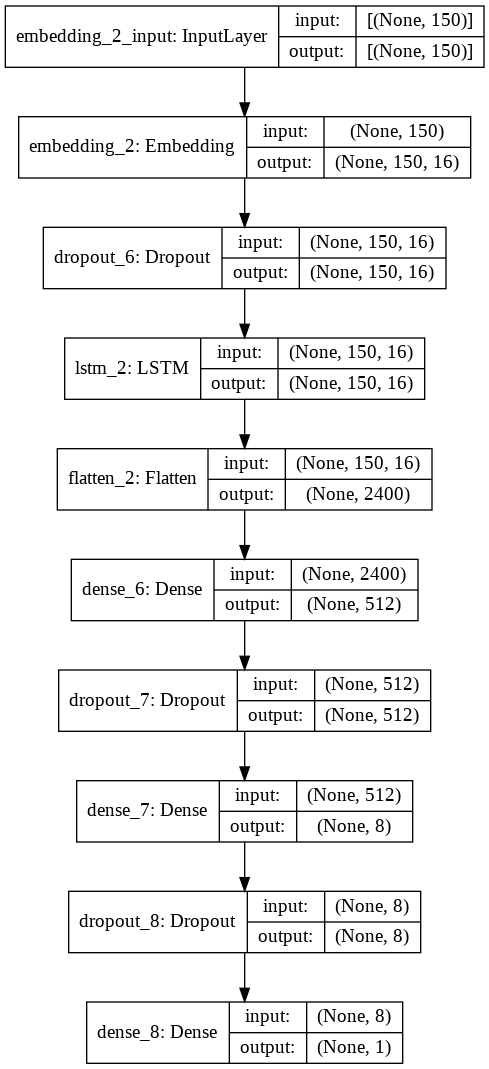

In [ ]:

tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [21]:
epochs = 30
# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )
history = model.fit(train_ds.shuffle(5000).batch(1024),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(1024),
                    verbose=1)

Epoch 1/30
9/9 [==============================] - 9s 670ms/step - loss: 3.6446 - accuracy: 0.0000e+00 - val_loss: 2.7019 - val_accuracy: 0.0000e+00
Epoch 2/30
9/9 [==============================] - 6s 617ms/step - loss: 2.2366 - accuracy: 0.0000e+00 - val_loss: 1.7010 - val_accuracy: 0.0000e+00
Epoch 3/30
9/9 [==============================] - 6s 620ms/step - loss: 1.4840 - accuracy: 0.2614 - val_loss: 1.2753 - val_accuracy: 0.6892
Epoch 4/30
9/9 [==============================] - 6s 622ms/step - loss: 1.2475 - accuracy: 0.5848 - val_loss: 1.2872 - val_accuracy: 0.6892
Epoch 5/30
9/9 [==============================] - 6s 617ms/step - loss: 1.4070 - accuracy: 0.6270 - val_loss: 1.6455 - val_accuracy: 0.6892
Epoch 6/30
9/9 [==============================] - 6s 612ms/step - loss: 1.8908 - accuracy: 0.6250 - val_loss: 2.3019 - val_accuracy: 0.6892
Epoch 7/30
9/9 [==============================] - 6s 612ms/step - loss: 2.6601 - accuracy: 0.6258 - val_loss: 3.2344 - val_accuracy: 0.6892
Epoc

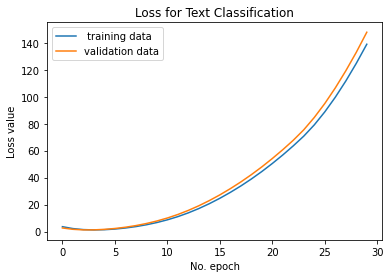

In [22]:
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [23]:

x_test  = np.array( tokenizer.texts_to_sequences(data_test['Text'].tolist()) )
x_test = pad_sequences(x_test, padding='post', maxlen=150)


In [24]:
print("Generate predictions for all samples")
predictions = model.predict(x_test)

Generate predictions for all samples


In [25]:

data_test['pred']= predictions

In [26]:

labels = [0,1,2]
    
print(classification_report(data_test['label'].tolist(),data_test['pred'].tolist(),labels=labels))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       836
           1       0.09      0.06      0.07       117
           2       0.00      0.00      0.00       113

    accuracy                           0.74      1066
   macro avg       0.30      0.33      0.31      1066
weighted avg       0.64      0.74      0.69      1066

